# Method I: Use Vertice

## Import processed data

In [1]:
import numpy as np

rsd = np.genfromtxt('rsd_array++.csv', delimiter=',')
assert len(rsd) == 13336

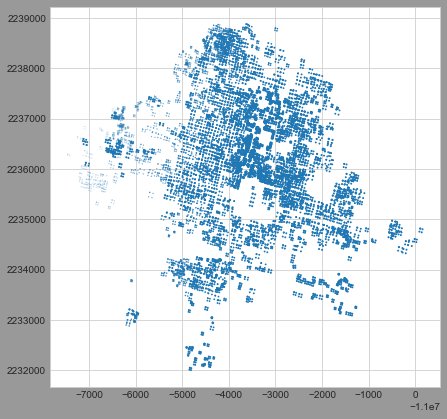

In [99]:
# rsd_show = rsd[::10]

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7), facecolor='.6')
plt.scatter(rsd[:, 0], rsd[:, 1], s = [i/10000 for i in range(13336)])
plt.show()

## Apply MeanShift

In [2]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
# from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

In [3]:
# ms = ms(bandwidth=bandwidth, bin_seeding=True)
ms = MeanShift(bandwidth = 400) # bandwidth is radius

# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms.fit(rsd)
labels = ms.labels_

# np.unique() -> how many unique elements there are
print('num of clusters:', len(np.unique(labels)))
print('center location: ', ms.cluster_centers_)

num of clusters: 24
center location:  [[-11003588.17695845   2236205.39693422]
 [-11004133.13586053   2238474.09047698]
 [-11003641.87176092   2236800.75689371]
 [-11002731.16651471   2235747.03814199]
 [-11002774.39550905   2236885.33716288]
 [-11004642.53658571   2235733.47418848]
 [-11002555.60260792   2236398.65544269]
 [-11004652.32293319   2233899.74831323]
 [-11006346.31272859   2236835.79223005]
 [-11004265.26013608   2234768.41692994]
 [-11001507.60748264   2235410.76949695]
 [-11003583.29480239   2234719.12059553]
 [-11001551.32674342   2234743.36833168]
 [-11002277.93076383   2237492.58713681]
 [-11002956.46436191   2234830.52976662]
 [-11006917.67468171   2235771.82090302]
 [-11001671.00483388   2233678.04003645]
 [-11002247.91209829   2233695.92240834]
 [-11004638.68741993   2232285.45635749]
 [-11000380.01707679   2234710.69388187]
 [-11005752.7710075    2237265.82416866]
 [-11006075.58699686   2233059.44350268]
 [-11004436.92237064   2232761.9601688 ]
 [-11006090.3966589

|bandwidth|number of cluster|
|-|-|
|100|524|
|200|144|
|400|24|

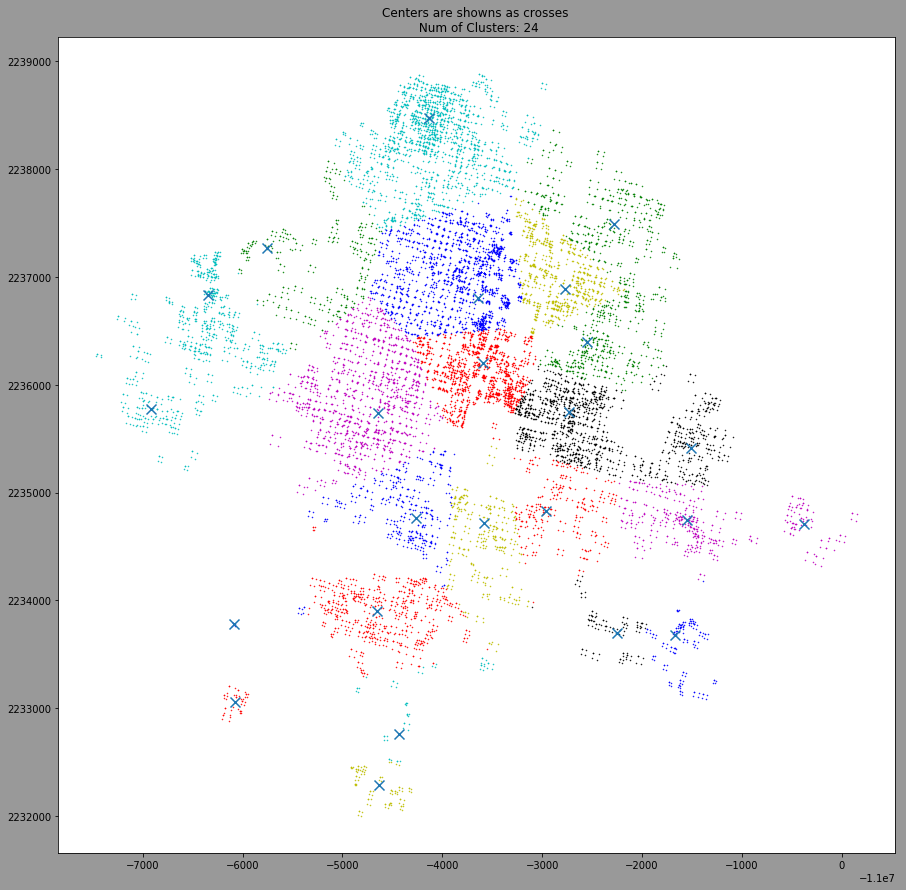

In [28]:
plt.figure(figsize = (15, 15), facecolor = '.6')

colors = ['r.', 'c.', 'b.', 'k.', 'y.', 'm.', 'g.']*1000
labels = ms.labels_


# plt.plot(1, rsd[3][1], colors[labels[3]], markersize = 1)
for i in range(len(rsd)):
    plt.plot(rsd[i][0], rsd[i][1], colors[labels[i]], markersize = 1)
    
plt.scatter(ms.cluster_centers_[:,0], ms.cluster_centers_[:,1],
           marker = 'x', s = 100, linewidths = 0.3, zorder =10)

plt.title("Centers are showns as crosses \n Num of Clusters: %d" % len(np.unique(labels)))
plt.show()

# Method II: Use Geometric Center - Data Processing & Export

# Apply MeanShift to Geometric Centroids

## Import Processed Centroid Data

In [146]:
rsd_ctr = np.genfromtxt('rsd_array_GeometricCentroids.csv', delimiter=',')
assert len(rsd_ctr) == 2455

In [135]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
import matplotlib.pyplot as plt

In [144]:
# ms = ms(bandwidth=bandwidth, bin_seeding=True)
ms = MeanShift(bandwidth = 10e13) # bandwidth is radius

# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms.fit(rsd_ctr)
labels = ms.labels_

# np.unique() -> how many unique elements there are
print('num of clusters:', len(np.unique(labels)))
print('center location: ', ms.cluster_centers_)

num of clusters: 11
center location:  [[ 3.46512545e+13 -7.04212657e+12]
 [ 5.91840293e+14 -1.20254401e+14]
 [ 8.03456436e+14 -1.63279739e+14]
 [ 9.46520847e+14 -1.92277710e+14]
 [ 1.07485552e+15 -2.18264625e+14]
 [ 1.34699096e+18 -2.73714381e+17]
 [ 1.67372288e+16 -3.40287101e+15]
 [ 1.32006299e+16 -2.68362394e+15]
 [ 1.47798783e+15 -3.00234072e+14]
 [ 1.29188409e+15 -2.62430852e+14]
 [-1.10782877e+19  2.25153583e+18]]


|bandwidth|No. of clusters|
|--|--|
|4000|2455|
|40000|2455|
|40000000000|1331|
|10e10|910|
|10e13|11|
|10e15|4|


# Test Data Validity

In [153]:
rsd_ctr

array([[ 3.17153181e+12, -6.44638773e+11],
       [ 2.02021577e+12, -4.10622385e+11],
       [ 1.52086991e+12, -3.09126755e+11],
       ...,
       [ 4.67606589e+12, -9.50738181e+11],
       [ 6.08461335e+12, -1.23769877e+12],
       [ 2.77687977e+13, -5.63840005e+12]])

In [180]:
np.where(rsd_ctr == np.max(rsd_ctr))


(array([2446]), array([0]))

In [190]:
rsd_ctr = np.concatenate((rsd_ctr[:2446], rsd_ctr[2447:]), axis = 0)


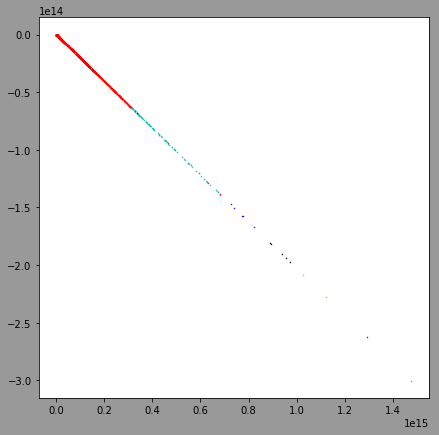

In [193]:
plt.figure(figsize = (7, 7), facecolor = '.6')
for i in range(len(rsd_ctr)):
    plt.plot(rsd_ctr[i][0], rsd_ctr[i][1], colors[labels[i]], markersize = 1)


In [192]:
len(rsd_ctr)

2446

## Graphing

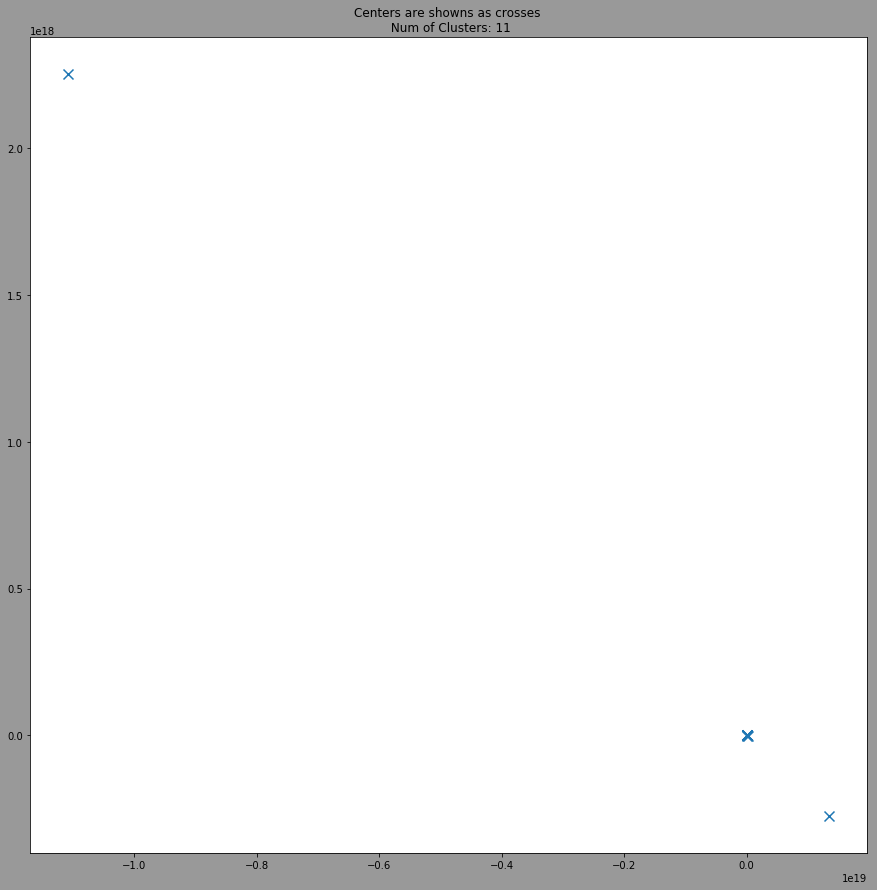

In [151]:
plt.figure(figsize = (15, 15), facecolor = '.6')

colors = ['r.', 'c.', 'b.', 'k.', 'y.', 'm.', 'g.']*1000
labels = ms.labels_

# for i in range(len(rsd_ctr)):
#     plt.plot(rsd_ctr[i][0], rsd_ctr[i][1], colors[labels[i]], markersize = 1)

plt.plot(rsd_ctr[i][0], rsd_ctr[i][1], colors[labels[i]], markersize = 1)

    
# paint center points
plt.scatter(ms.cluster_centers_[:,0], ms.cluster_centers_[:,1],
           marker = 'x', s = 100, linewidths = 0.3, zorder =10)

plt.title("Centers are showns as crosses \n Num of Clusters: %d" % len(np.unique(labels)))
plt.show()